<a href="https://colab.research.google.com/github/dagbeme1/holbertonschool-gan/blob/master/Precision_Changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


11490434/11490434 [==============================] - 0s 0us/step


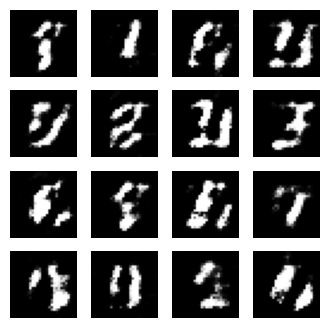

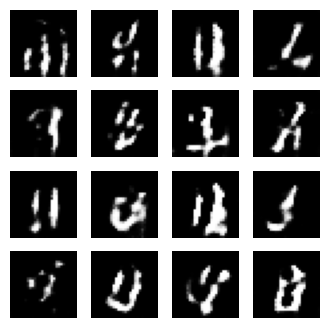

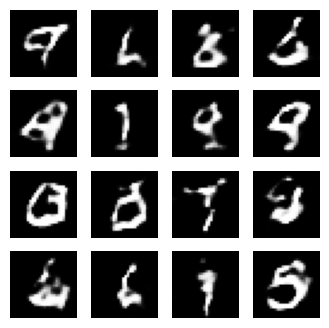

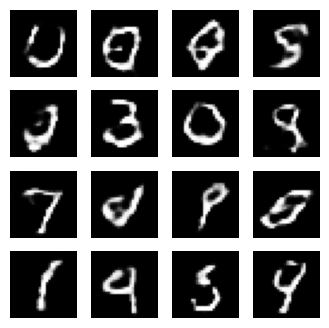

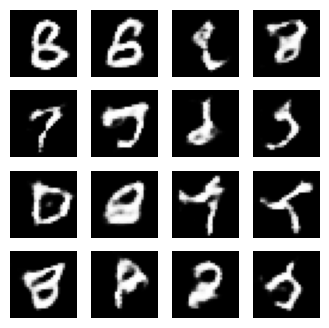

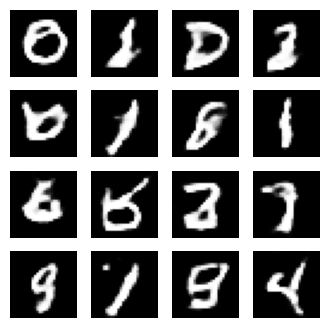

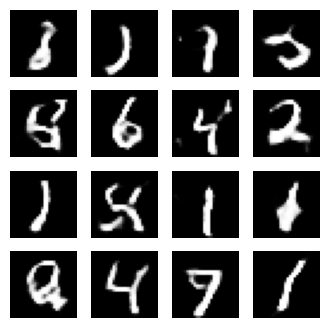

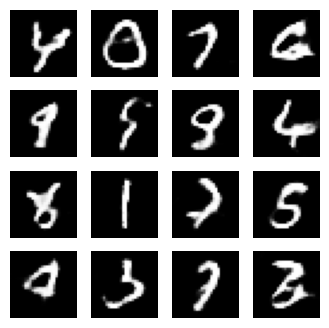

In [5]:
#!/usr/bin/env python3

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import wandb  # Import the wandb library for experiment tracking
from wandb.keras import WandbCallback

# Define the generator model
def make_generator_model():
    """
    Create a generator model that generates images from random noise.

    Returns:
        tf.keras.Model: Generator model.
    """
    model = tf.keras.Sequential()
    model.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256))

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

# Define the discriminator model
def make_discriminator_model():
    """
    Create a discriminator model to distinguish real from generated images.

    Returns:
        tf.keras.Model: Discriminator model.
    """
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3)

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

# Define the loss functions for generator and discriminator
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    """
    Calculate the discriminator loss.

    Args:
        real_output (tf.Tensor): Output of the discriminator for real images.
        fake_output (tf.Tensor): Output of the discriminator for generated images.

    Returns:
        tf.Tensor: Discriminator loss.
    """
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    """
    Calculate the generator loss.

    Args:
        fake_output (tf.Tensor): Output of the discriminator for generated images.

    Returns:
        tf.Tensor: Generator loss.
    """
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Define the optimizers for generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Define the training step
@tf.function
def train_step(images, generator):
    noise = tf.random.normal([config.batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables)

# Define a function to generate and save images
def generate_and_save_images(model, epoch, test_input):
    """
    Generate and save images using the generator model.

    Args:
        model (tf.keras.Model): Generator model.
        epoch (int): Current training epoch.
        test_input (tf.Tensor): Random input for generating images.
    """
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

# Main training loop
def train(dataset, epochs, generator, discriminator, save_interval):
    """
    Main training loop for the GAN.

    Args:
        dataset (tf.data.Dataset): Input dataset.
        epochs (int): Number of training epochs.
        generator (tf.keras.Model): Generator model.
        discriminator (tf.keras.Model): Discriminator model.
        save_interval (int): Interval for saving generated images.
    """
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch, generator)
        if (epoch + 1) % save_interval == 0:
            noise = tf.random.normal([16, 100])
            generate_and_save_images(generator, epoch + 1, noise)

# Set the interval at which you want to save images (e.g., every 10 epochs)
save_interval = 10

# Initialize Weights and Biases for experiment tracking
wandb.init(project="dcgan_mnist")
config = wandb.config
config.epochs = 80
config.batch_size = 256

# Load the MNIST dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float16')
train_images = (train_images - 127.5) / 127.5

BUFFER_SIZE = 60000
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(config.batch_size)

# Create and compile the generator and discriminator models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Train the GAN
train(train_dataset, config.epochs, generator, discriminator, save_interval)

In [3]:
pip install matplotlib

In [2]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=bc61729c3316db8856ec349caa8e137897ea69a3303a14661f9296c649d94916
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools
